In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DIRECTORY = '/content/drive/My Drive/Informatics/Sphere@mail.ru/1_Data_Analysis/Lec_5/'

# Функции

In [ ]:
from datetime import datetime


def current_seconds():
    """Return current seconds"""
    return datetime.now().second


current_seconds()

30

In [ ]:
help(current_seconds)

Help on function current_seconds in module __main__:

current_seconds()
    Return current seconds



SHIFT + TAB (CTRL + SHIFT + SPACE IN COLAB)

In [ ]:
current_seconds()

30

In [ ]:
current_seconds?

##  Что такое функция?

In [ ]:
print(type(current_seconds))

<class 'function'>


In [ ]:
current_seconds.__name__

'current_seconds'

In [ ]:
current_seconds.__doc__

'Return current seconds'

In [ ]:
dir(current_seconds)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

### В Python всё является объектом 😱

In [ ]:
print(type(5))

<class 'int'>


In [ ]:
dir(5)

['__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__xor__',
 'bit_length',
 'conjugate',
 'denominator',
 'from_bytes',
 'imag',
 'numerator',
 'real',
 'to_bytes']

Объекты, имеющие одинаковые значения, не обязаны храниться по одному и тому же адресу.

Оптимизация для `int`: https://docs.python.org/3.7/c-api/long.html

In [ ]:
a, b = 4, 4

id(a), id(b), id(a) == id(b)

(10914592, 10914592, True)

In [ ]:
a, b = 15306, 15306

id(a), id(b), id(a) == id(b)

(140489230196688, 140489230196688, True)

### Хорошо, и что дальше?

In [ ]:
func = current_seconds
func()

23

In [ ]:
func

<function __main__.current_seconds>

In [ ]:
def add(a, b):
    return a + b

def power(a, b):
    return a ** b

def sub(a, b):
    return a - b

key = 'power'

func = {
    'add':   add,
    'power': power,
    'sub':   sub,
}[key]

func(2, 3)

8

<span style="color:blue;font-weight:bold">Жизненный пример</span>

Предположим, мы хотим написать класс для поиска ближайшего соседа `NearestNeighborsFinder`. Поиск соседей будем реализовывать с помощью метода полного перебора.

```python
class NearestNeighborsFinder:
    def __init__(self, n_neighbors, metric="euclidean"):
        self.n_neighbors = n_neighbors

        if metric == "euclidean":
            self._metric_func = euclidean_distance
        elif metric == "cosine":
            self._metric_func = cosine_distance
        else:
            raise ValueError("Metric is not supported", metric)
        self.metric = metric

    def fit(self, X, y=None):
        self._X = X
        return self

    def kneighbors(self, X, return_distance=False):
        # используем выбранную функцию для подсчета расстояний
        distances = self._metric_func(X, self._X)
        ...
```

In [ ]:
current_seconds.secret = "iMh52KgXWwg"
current_seconds.secret

'iMh52KgXWwg'

In [ ]:
def func():
    func.counter += 1

func.counter = 0

In [ ]:
for i in range(5):
    func()
    
func.counter

5

In [ ]:
def func():
    if not hasattr(func, 'counter'):
        setattr(func, 'counter', 0)
    func.counter += 1

In [ ]:
for i in range(7):
    func()
    
func.counter

7

In [ ]:
def foo():
    def bar():
        return 42
    
    print("here")
    return bar()

foo()

here


42

Не злоупотребляйте объявлением функций внутри функций. Такое объявление имеет смысл только в том случае, если внутренняя функция больше никому не понадобится.

Первый <span style="color:blue;font-weight:bold">хороший</span> пример:

```python
def load_data(filename):
    def parse(s):
        doc_id, url, ts = s.split('\t')
        doc_id = int(doc_id)
        ts = datetime.fromtimestamp(int(ts))
        return doc_id, url, ts
    
    with open(filename) as f:
        f = map(parse, f)
        for doc_id, url, ts in f:
            pass
            
    return data
```

Второй <span style="color:blue;font-weight:bold">хороший</span> пример – декораторы. 😈

<span style="color:red;font-weight:bold">НИКОГДА</span> не делайте так, как показано ниже.

In [ ]:
# Внимание на количество аргументов!

def func(a, b):
    pass

func.__code__ = current_seconds.__code__
func()

29

In [ ]:
func

<function __main__.func>

## Как можно и как нельзя вызывать функции?

In [ ]:
current_seconds(5)

TypeError: ignored

In [ ]:
def func(a, b, c, d):
    print(f"a = {a}; b = {b}; c = {c}; d = {d}")

In [ ]:
func()

TypeError: ignored

In [ ]:
func(1, 2, 3, 4)

a = 1; b = 2; c = 3; d = 4


In [ ]:
func(c=1, b=2, a=3, d=4)

a = 3; b = 2; c = 1; d = 4


In [ ]:
func(1, 2, d=3, c=4)

a = 1; b = 2; c = 4; d = 3


In [ ]:
func(1, 3, a=2, d=4)

TypeError: ignored

In [ ]:
func(a=1, b=2, 1, 3)

SyntaxError: ignored

### Распаковка аргументов

In [ ]:
args = (1, 2, 3, 4)
func(*args)

a = 1; b = 2; c = 3; d = 4


In [ ]:
args = ['str1', 'str2', 'str3']
print(*args)

str1 str2 str3


In [ ]:
print(args)

['str1', 'str2', 'str3']


In [ ]:
def func_complex(learning_rate, item_alpha, user_alpha, option):
    return 42

In [ ]:
learning_rate = 1
item_alpha = 3
user_alpha = 4
option = 2

# Сложные логические вычисления аргументов функции (или загрузка конфигурации) ...
# Длинные именнованые аргументы...

func_complex(learning_rate=learning_rate, item_alpha=item_alpha,
             user_alpha=user_alpha, option=option)

42

In [ ]:
kwargs = {
    'learning_rate': 1,
    'item_alpha':    3,
    'user_alpha':    4,
    'option':        2,
}

func_complex(**kwargs)

42

С одной стороны вызовы через распаковку компактнее, с другой стороны – менее читабельные. Нужно ловить баланс между использованием обоих вариантов. 

<span style="color:blue;font-weight:bold">Хороший</span> пример баланса использования распаковки и именованных аргументов:

```python
params = { "user_features": user_features, 
           "item_features": item_features,
           "num_threads": 32 }

scores = []

for _ in range(epochs):
    scores.append([])
    
    for model, (X_train, X_valid) in zip(models, datasets):
        model.fit_partial(X_train, epochs=1, **params)
        score_train = auc_score(model=model, test_interactions=X_train, **params).mean()
        score_valid = auc_score(model=model, test_interactions=X_valid, **params).mean()
        scores[-1].append((score_train, score_valid))
        
scores = np.asarray(scores)
```

<span style="color:blue;font-weight:bold">Хороший</span> пример с использованием конфигурации:
```python
import json

config = json.load(open(PATH_CONFIG, "r"))
config = config[args.ranker]

...

model = shrink_model(model, **config["shrink"])
```

In [ ]:
args = (2, 1)
kwargs = { 'd': 3, 'c': 4, }

func(*args, **kwargs)

a = 2; b = 1; c = 4; d = 3


In [ ]:
# Функция, которая принимает все, что угодно

def func(*args, **kwargs):
    pass

func()
func(5, 6, 7)
func([4], 5, b=12, d=6)
func(a=6, b=8)

In [ ]:
def func(a, b, *args, **kwargs):
    print("Function has started.")
    print("a = {}".format(a))
    print("b = {}".format(b))
    print("args = {}".format(args))
    print("kwargs = {}".format(kwargs))
    print("Function has finished.")

In [ ]:
func(1, 4)

Function has started.
a = 1
b = 4
args = ()
kwargs = {}
Function has finished.


In [ ]:
func(1, 4, 2, 3, f=6, n=7, m=12)

Function has started.
a = 1
b = 4
args = (2, 3)
kwargs = {'f': 6, 'n': 7, 'm': 12}
Function has finished.


### Механизм распаковки. Где еще?

<span style="color:blue;font-weight:bold">Пример:</span> установка нескольких значений

In [ ]:
content_title, content_descr = [], []

<span style="color:blue;font-weight:bold">Пример:</span>  обмен значениями `swap`

In [ ]:
a = 2345
b = 7892

a, b = b, a   # same as (a, b) = (b, a)

a, b

(7892, 2345)

<span style="color:blue;font-weight:bold">Пример:</span> распаковка результата функции

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)
```

In [ ]:
tpl = ('jklm', 2, 'j', 'k')

In [ ]:
*_, a = tpl      # same as _, _, _, a = tpl
a

'k'

In [ ]:
*b, a = tpl
a, b

('k', ['jklm', 2, 'j'])

In [ ]:
*_, a, b = tpl   # same as _, _, a, b = tpl
a, b

('j', 'k')

In [ ]:
a, *_ = tpl      # same as a, _, _, _ = tpl
a

'jklm'

In [ ]:
a, *_, b = tpl   # same as a, _, _, b = tpl
a, b

('jklm', 'k')

## Аргументы по ссылке или по значению?

Пример для C++: https://repl.it/@vbugaevskii/ValueVsRefernceCpp

Пример для Java: https://repl.it/@vbugaevskii/ValueVsRefernceJava

Как вообразить себе передачу по ссылке, если я еще не был знаком с Java и Python, но знаком с C++?

1. Создается ссылка `refA` на объект `objA`;
2. Ссылка `refA` передается в функцию по значению, т.е. создается копия `copyRefA`.

Поэтому чтобы изменить объект `objA` по ссылке `copyRefA`, нужно вызвать метод меняющий содержимое `objA`, либо "явно обратиться" к данным `objA` через ссылку `copyRefA`.

`copyRefA = copyRefB` означает, что `copyRefA` теперь совпадает c `copyRefB` и указывает на объект B.

Объекты неизменяемых типов, например, `int`, `float`, `complex`, `str`, `unicode`, `tuple` и др., нельзя поменять внутри функции. Можно вернуть лишь новую версию объекта.

В документации к Python такая передача аргументов именутся, как *pass by assignment*.

In [ ]:
a = [1, 2, 3]
b = a

a, b, id(a), id(b)

([1, 2, 3], [1, 2, 3], 140489230007880, 140489230007880)

In [ ]:
a = [1, 2, 3]
b = 5

def func(x, y):
    x.append(4)
    y += 1
    
func(a, b)
a, b

([1, 2, 3, 4], 5)

In [ ]:
a = [1, 2, 3]
b = [4, 5, 6]

def swap(x, y):
    x, y = y, x
    
swap(a, b)
a, b

([1, 2, 3], [4, 5, 6])

In [ ]:
a = [1, 2, 3]
b = [4, 5, 6]

def swap(x, y):
    x[:], y[:] = y[:], x[:]
    
swap(a, b)
a, b

([4, 5, 6], [1, 2, 3])

In [ ]:
a = [1, 2, 3]
b = [4, 5, 6]

def swap(x, y):
    x[:], y[:] = y, x
    
swap(a, b)
a, b

([4, 5, 6], [4, 5, 6])

In [ ]:
def change_tuple(a):
    # явное обращение к данным
    a[0].append('maddnes')
    return a
    
a = ([], )
b = change_tuple(a)

print("a = {}; id(a) = {}".format(repr(a), id(a)))
print("b = {}; id(b) = {}".format(repr(b), id(b)))

a is b

a = (['maddnes'],); id(a) = 140489081073904
b = (['maddnes'],); id(b) = 140489081073904


True

## Область видимости

Основное правило поиска **LEGB**: Local -> Enclosed -> Global -> Built-in

Области видимости относительно функции `foo`.

```python
# global

def bar():
    # enclosed
    
    def foo():
        pass # local
        
    # enclosed
    return foo

# global
```

In [ ]:
result = "GLOBAL"

def func():
    print("[local]\t\t", result)

func()

[local]		 GLOBAL


In [ ]:
result = "GLOBAL"

def func():
    result = "LOCAL"
    print("[local]\t\t", result)

print("[global]\t", result)
func()
print("[global]\t", result)

[global]	 GLOBAL
[local]		 LOCAL
[global]	 GLOBAL


In [ ]:
result = "GLOBAL"

def func():
    global result     # разрешает менять значение глобальной переменной
    result = "LOCAL"
    print("[local]\t\t", result)

print("[global]\t", result)
func()
print("[global]\t", result)

[global]	 GLOBAL
[local]		 LOCAL
[global]	 LOCAL


In [ ]:
result = "GLOBAL"

def func():
    print("[local]\t\t", result)
    result = "LOCAL"
    print("[local]\t\t", result)

print("[global]\t", result)
func()
print("[global]\t", result)

[global]	 GLOBAL


UnboundLocalError: ignored

In [ ]:
result = 'GLOBAL'

def func_outer():  # outer function
    result = 'ENCLOSED'
    print("[enclosed]\t", result)

    def func():    # nested (inner) function
        result = 'LOCAL'
        print("[local]\t\t", result)

    func()
    print("[enclosed]\t", result)

print("[global]\t", result)
func_outer()
print("[global]\t", result)

[global]	 GLOBAL
[enclosed]	 ENCLOSED
[local]		 LOCAL
[enclosed]	 ENCLOSED
[global]	 GLOBAL


In [ ]:
result = 'GLOBAL'

def func_outer():
    result = 'ENCLOSED'
    print("[enclosed]\t", result)
    
    def func():
        global result
        result = 'LOCAL'
        print("[local]\t\t", result)
        
    func()
    print("[enclosed]\t", result)

print("[global]\t", result)
func_outer()
print("[global]\t", result)

[global]	 GLOBAL
[enclosed]	 ENCLOSED
[local]		 LOCAL
[enclosed]	 ENCLOSED
[global]	 LOCAL


In [ ]:
result = 'GLOBAL'

def func_outer():
    result = 'ENCLOSED'
    print("[enclosed]\t", result)
    
    def func():
        nonlocal result   # разрешает менять значение enclosed переменной
        result = 'LOCAL'
        print("[local]\t\t", result)
        
    func()
    print("[enclosed]\t", result)

print("[global]\t", result)
func_outer()
print("[global]\t", result)

[global]	 GLOBAL
[enclosed]	 ENCLOSED
[local]		 LOCAL
[enclosed]	 LOCAL
[global]	 GLOBAL


In [ ]:
result = 'GLOBAL'

def func_outer():
    result = 'ENCLOSED'
    
    def func():
        nonlocal result   # разрешает менять значение enclosed переменной
        result = 'LOCAL'
    
    print("closure:", func.__closure__)
    print("closure content:", func.__closure__[0].cell_contents)
    
    func()

print("[global]\t", result)
func_outer()
print("[global]\t", result)

[global]	 GLOBAL
closure: (<cell at 0x7fc629cc5b58: str object at 0x7fc629be2d30>,)
closure content: ENCLOSED
[global]	 GLOBAL


## Аргументы по-умолчанию

In [ ]:
def sum_list(a, start_with=0):
    return sum(a[start_with:])

print(sum_list([4, 2, 3]))
print(sum_list([4, 2, 3], start_with=1))

9
5


In [ ]:
def sum_list(start_with=0, a):
    return sum(a[start_with:])

SyntaxError: ignored

### Ожидание vs. Реальность

In [ ]:
def append_one_list(a=[]):
    print("\tBefore:", a)
    a.append(1)
    print("\tAfter: ", a)

In [ ]:
a = [1, 2, 3]

print("Before:", a)
print("=" * 30)
append_one_list(a)
append_one_list(a)
append_one_list(a)
print("=" * 30)
print("After: ", a)

Before: [1, 2, 3]
	Before: [1, 2, 3]
	After:  [1, 2, 3, 1]
	Before: [1, 2, 3, 1]
	After:  [1, 2, 3, 1, 1]
	Before: [1, 2, 3, 1, 1]
	After:  [1, 2, 3, 1, 1, 1]
After:  [1, 2, 3, 1, 1, 1]


In [ ]:
print("Before:", None)
print("=" * 30)
append_one_list()
append_one_list()
append_one_list()
print("=" * 30)
print("After: ", None)

Before: None
	Before: []
	After:  [1]
	Before: [1]
	After:  [1, 1]
	Before: [1, 1]
	After:  [1, 1, 1]
After:  None


In [ ]:
append_one_list.__defaults__

([1, 1, 1],)

In [ ]:
def append_one_list(a=None):
    if a is None:
        a = []
    
    print("\tBefore:", a)
    a.append(1)
    print("\tAfter: ", a)


def append_one_list(a=None):
    # Подумайте, почему это работает? Какие минусы есть у такого варианта?
    # Нужны ли какие-то дополнительные предположения о входном списке a?
    a = a or []
    
    print("\tBefore:", a)
    a.append(1)
    print("\tAfter: ", a)

In [ ]:
a = [1, 2, 3]

print("Before:", a)
print("=" * 30)
append_one_list(a)
append_one_list(a)
append_one_list(a)
print("=" * 30)
print("After: ", a)

Before: [1, 2, 3]
	Before: [1, 2, 3]
	After:  [1, 2, 3, 1]
	Before: [1, 2, 3, 1]
	After:  [1, 2, 3, 1, 1]
	Before: [1, 2, 3, 1, 1]
	After:  [1, 2, 3, 1, 1, 1]
After:  [1, 2, 3, 1, 1, 1]


In [ ]:
print("Before:", None)
print("=" * 30)
append_one_list()
append_one_list()
append_one_list()
print("=" * 30)
print("After: ", None)

Before: None
	Before: []
	After:  [1]
	Before: []
	After:  [1]
	Before: []
	After:  [1]
After:  None


# Элементы функционального программирования

## Анонимные функции (или lambda-функции)

In [ ]:
result = {
    'a': 1,
    'b': 3,
    'c': 2,
    'd': 5,
    'f': 4,
}

In [ ]:
sorted(result.items(), reverse=True)

[('f', 4), ('d', 5), ('c', 2), ('b', 3), ('a', 1)]

In [ ]:
def func_key(pair):
    return pair[1]

print(type(func_key))

sorted(result.items(), key=func_key, reverse=True)

<class 'function'>


[('d', 5), ('f', 4), ('b', 3), ('c', 2), ('a', 1)]

In [ ]:
sorted(result.items(), key=lambda pair: pair[1], reverse=True)

[('d', 5), ('f', 4), ('b', 3), ('c', 2), ('a', 1)]

Мнемоническое правило:

```python
def <lambda>(pair):
    return pair[1]
```

In [ ]:
func = lambda pair: pair[1]
print(type(func))

<class 'function'>


In [ ]:
from operator import itemgetter

sorted(result.items(), key=itemgetter(1), reverse=True)

[('d', 5), ('f', 4), ('b', 3), ('c', 2), ('a', 1)]

In [ ]:
a = list(range(-5, 5))
a

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]

In [ ]:
sorted(a, key=lambda x: x**2)

[0, -1, 1, -2, 2, -3, 3, -4, 4, -5]

In [ ]:
import functools

func = functools.partial(sorted, key=itemgetter(1))
func(result.items())

[('a', 1), ('c', 2), ('b', 3), ('f', 4), ('d', 5)]

In [ ]:
[
    lambda x: x ** 2,
    lambda x, y: x < y,
    lambda s: s.strip().split(),
    lambda *a: len(a),
    lambda **a: 'key' in a,
    lambda *a, **b: len(a) + len(b),
]

[<function __main__.<lambda>>,
 <function __main__.<lambda>>,
 <function __main__.<lambda>>,
 <function __main__.<lambda>>,
 <function __main__.<lambda>>,
 <function __main__.<lambda>>]

## Функция map

In [ ]:
result_a = range(10)
result_b = map(lambda x: x ** 2, result_a)

print(list(result_a))
print(list(result_b))

result_b

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [ ]:
result = [
    ('a', 1),
    ('b', 3),
    ('c', 2),
    ('d', 5),
    ('f', 4),
]

list(map(itemgetter(0), result))

['a', 'b', 'c', 'd', 'f']

In [ ]:
result = '1,2,3,4,5,6\n'

list(map(int, result.split(',')))

[1, 2, 3, 4, 5, 6]

In [ ]:
list(map(ord, 'education'))

[101, 100, 117, 99, 97, 116, 105, 111, 110]

In [ ]:
# !zcat files/example.jsonl.gz | head -n2   # unix
!gzcat files/example.jsonl.gz | head -n2   # macos

{"title": "В Сети появилось видео потасовки в Верховной раде", "description": "В интернете появилась видеозапись, на которой запечатлена потасовка между народным депутатом Владимиром Парасюком и депутатами Оппозиционного блока . На видео видно, как Парасюк прерывает ...", "keywords": ["Выступление", "Депутат", "Колесников", "Ситуация", "Требовать", "Садовый", "Колесник", "Украинский", "Говорить", "Владимир", "Высказывать", "Критиковать", "Результат", "Устроить", "Столкновение", "Проблема", "Антиукраинский", "Прерывать", "Народный", "Полигон"], "tags": ["вершина", "драка", "потасовка", "«Оппозиционный блок»"], "url": "https://www.rbc.ru/rbcfreenews/576169b99a7947071ca21201", "rubric": "Политика", "is_ok": true} 
{"title": "Приставы забрали у Ходорковского в бюджет 750 тыс. руб. ", "description": "Судебные приставы не дали перевести Михаилу Ходорковскому компенсацию в €10 тыс., присужденную ЕСПЧ. Сумма пошла на погашение его долга перед бюджетом, тогда как сам Ходорковский надеялся отдат

In [ ]:
import gzip
import json

with gzip.open(DIRECTORY + "files/example.jsonl.gz", "rb") as f_name:
    for record in map(json.loads, f_name):
        print(record['rubric'], sep='\t')

Политика
«Дело ЮКОСа»
Обвал рынков
Экономика
Украинский кризис
Мнение
ПМЭФ — 2016
Общество
Общество
Политика
Политика
Технологии и медиа
Общество
Бизнес
Финансы
Допинговый скандал
Общество
Возвращение Крыма
Бизнес
Общество


<span style="color:blue;font-weight:bold">Подумайте</span>, когда лучше использовать конструкцию:

```python
for record_str in f_name:
    record = parse(record_str)
    do_something(record)
```

вместо

```python
for record in map(parse, f_name):
    do_something(record)
```

**Подсказка:** к верхнему примеру нужно еще дописать пару строчек, чтобы он в полной мере был оправдан :)

In [ ]:
import operator

In [ ]:
result_a = [5, 6, 7]
result_b = [4, 5, 6]

list(map(operator.add, result_a, result_b))

[9, 11, 13]

In [ ]:
result = [(5, 4), (6, 5), (7, 6)]

In [ ]:
list(map(lambda x, y: x + y, result))

TypeError: ignored

In [ ]:
list(map(lambda (x, y): x + y, result))

SyntaxError: ignored

В стандарте больше нет поддержки кортежей как аргументов, см. [PEP-3113](https://www.python.org/dev/peps/pep-3113/).

In [ ]:
%%python2

from __future__ import print_function

result = [(5, 4), (6, 5), (7, 6)]
result = map(lambda (x, y): x + y, result)

print(*result)

9 11 13


In [ ]:
list(map(lambda p: p[0] + p[1], result))

[9, 11, 13]

In [ ]:
from itertools import starmap

list(starmap(operator.add, result))   # same as: list(map(lambda p: operator.add(*p), result))

[9, 11, 13]

Пока вы не извлечете из map все элементы, ничего не будет работать.

In [ ]:
a = [] 
b = map(lambda e: a.append(len(a)), range(10)) 
a, b

([], <map at 0x7fc632231da0>)

In [ ]:
# попробуйте выполнить ячейку более одного раза ;)

_ = list(b)
a, b, _

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <map at 0x7fc632231da0>, [])

Пример сильно <span style="color:red;font-weight:bold">перегруженного</span> кода:

```python
with gzip.open("files/example.jsonl.gz", "rb") as f_name:
    result = list(map(itemgetter('rubric'), map(json.loads, f_name)))
```

Пример <span style="color:blue;font-weight:bold">хорошо</span> организованного кода:

```python
with gzip.open("files/example.jsonl.gz", "rb") as f_name:
    f_name = map(json.loads, f_name)
    f_name = map(itemgetter('rubric'), f_name)
    result = list(f_name)
```

## Функция filter

In [ ]:
filter(lambda x: x > 0, range(-5, 5))

In [ ]:
list(filter(lambda x: x > 0, range(-5, 5)))

[1, 2, 3, 4]

In [ ]:
list(filter(lambda x: x % 2, range(-5, 5)))

[-5, -3, -1, 1, 3]

In [ ]:
list(filter(lambda x: x not in {'п', 'л'}, "параллелепипед"))

['а', 'р', 'а', 'е', 'е', 'и', 'е', 'д']

`filter` для словарей.

In [ ]:
result = {
    'key1': 1,
    'key2': 2,
    'key3': 3,
    'art': 'Hermitage',
    'ord': 7,
}

In [ ]:
{k: result[k] for k in filter(lambda k: k.startswith('key'), result)}

{'key1': 1, 'key2': 2, 'key3': 3}

In [ ]:
dict(filter(lambda p: p[0].startswith('key'), result.items()))

{'key1': 1, 'key2': 2, 'key3': 3}

In [ ]:
# предпочтительный вариант

{k: v for k, v in result.items() if k.startswith('key')}

{'key1': 1, 'key2': 2, 'key3': 3}

## Функция reduce

In [ ]:
from functools import reduce

In [ ]:
def my_reduce(func, seq):
    res = seq[0]
    for elem in seq[1:]:
        res = func(res, elem)
    return res

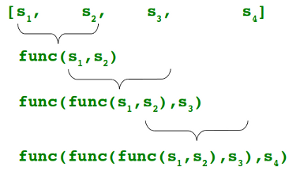
<img src="files/reduce.png">

In [ ]:
print(my_reduce(lambda x, y: x + y, [1, 2, 3, 4]))
print(my_reduce(lambda x, y: x * y, [1, 2, 3, 4]))

10
24


In [ ]:
print(reduce(lambda x, y: x + y, [1, 2, 3, 4]))
print(reduce(lambda x, y: x * y, [1, 2, 3, 4]))

10
24


In [ ]:
from operator import add, mul

print(reduce(add, [1, 2, 3, 4]))
print(reduce(mul, [1, 2, 3, 4]))

10
24


## Функция zip

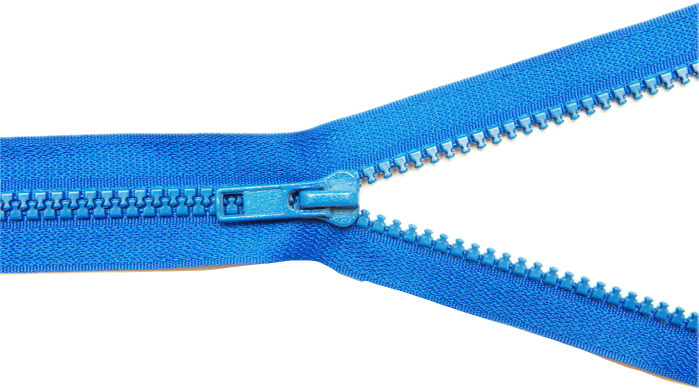
<img src="files/zip.png" width="420px">

In [ ]:
zip(range(10), "параллелепипед")

In [ ]:
list(zip(range(10), "параллелепипед"))

[(0, 'п'),
 (1, 'а'),
 (2, 'р'),
 (3, 'а'),
 (4, 'л'),
 (5, 'л'),
 (6, 'е'),
 (7, 'л'),
 (8, 'е'),
 (9, 'п')]

In [ ]:
list(zip(
    "параллелепипед",
    range(10),
    [True, True, True, False, False, True, False]
))

[('п', 0, True),
 ('а', 1, True),
 ('р', 2, True),
 ('а', 3, False),
 ('л', 4, False),
 ('л', 5, True),
 ('е', 6, False)]

In [ ]:
s = "параллелепипед"
list(zip(range(len(s)), s))

[(0, 'п'),
 (1, 'а'),
 (2, 'р'),
 (3, 'а'),
 (4, 'л'),
 (5, 'л'),
 (6, 'е'),
 (7, 'л'),
 (8, 'е'),
 (9, 'п'),
 (10, 'и'),
 (11, 'п'),
 (12, 'е'),
 (13, 'д')]

In [ ]:
enumerate("параллелепипед")

In [ ]:
list(enumerate("параллелепипед"))

[(0, 'п'),
 (1, 'а'),
 (2, 'р'),
 (3, 'а'),
 (4, 'л'),
 (5, 'л'),
 (6, 'е'),
 (7, 'л'),
 (8, 'е'),
 (9, 'п'),
 (10, 'и'),
 (11, 'п'),
 (12, 'е'),
 (13, 'д')]

In [ ]:
for i, c in enumerate("параллелепипед"):
    print(i, c, sep='\t')

0	п
1	а
2	р
3	а
4	л
5	л
6	е
7	л
8	е
9	п
10	и
11	п
12	е
13	д


In [ ]:
from itertools import zip_longest

list(zip_longest(range(10), "параллелепипед"))

[(0, 'п'),
 (1, 'а'),
 (2, 'р'),
 (3, 'а'),
 (4, 'л'),
 (5, 'л'),
 (6, 'е'),
 (7, 'л'),
 (8, 'е'),
 (9, 'п'),
 (None, 'и'),
 (None, 'п'),
 (None, 'е'),
 (None, 'д')]

In [ ]:
list(zip_longest(range(10), "параллелепипед", fillvalue=-1))

[(0, 'п'),
 (1, 'а'),
 (2, 'р'),
 (3, 'а'),
 (4, 'л'),
 (5, 'л'),
 (6, 'е'),
 (7, 'л'),
 (8, 'е'),
 (9, 'п'),
 (-1, 'и'),
 (-1, 'п'),
 (-1, 'е'),
 (-1, 'д')]

In [ ]:
list(zip_longest(
    "параллелепипед",
    range(10),
    [True, True, True, False, False, True, False]
))

[('п', 0, True),
 ('а', 1, True),
 ('р', 2, True),
 ('а', 3, False),
 ('л', 4, False),
 ('л', 5, True),
 ('е', 6, False),
 ('л', 7, None),
 ('е', 8, None),
 ('п', 9, None),
 ('и', None, None),
 ('п', None, None),
 ('е', None, None),
 ('д', None, None)]

In [ ]:
!cat files/documents.txt

426156754	https://habr.com/ru/company/mailru/blog/463045/	1565611920
4086447006	https://habr.com/ru/company/mailru/blog/462769/	1565877120
3093770339	https://habr.com/ru/company/mailru/blog/463063/	1565345880
1095223504	https://habr.com/ru/company/mailru/blog/462811/	1565169840
3229467448	https://habr.com/ru/company/mailru/blog/461927/	1564500300


In [ ]:
def parse(s):
    doc_id, url, ts = s.split('\t')
    doc_id, ts = map(int, (doc_id, ts))
    return doc_id, url, ts

with open(DIRECTORY + "files/documents.txt", "r") as f_name:
    result = list(map(parse, f_name))

result

[(426156754, 'https://habr.com/ru/company/mailru/blog/463045/', 1565611920),
 (4086447006, 'https://habr.com/ru/company/mailru/blog/462769/', 1565877120),
 (3093770339, 'https://habr.com/ru/company/mailru/blog/463063/', 1565345880),
 (1095223504, 'https://habr.com/ru/company/mailru/blog/462811/', 1565169840),
 (3229467448, 'https://habr.com/ru/company/mailru/blog/461927/', 1564500300)]

In [ ]:
list(map(itemgetter(1), result))

['https://habr.com/ru/company/mailru/blog/463045/',
 'https://habr.com/ru/company/mailru/blog/462769/',
 'https://habr.com/ru/company/mailru/blog/463063/',
 'https://habr.com/ru/company/mailru/blog/462811/',
 'https://habr.com/ru/company/mailru/blog/461927/']

In [ ]:
[list(map(itemgetter(i), result)) for i in range(len(result[0]))]

[[426156754, 4086447006, 3093770339, 1095223504, 3229467448],
 ['https://habr.com/ru/company/mailru/blog/463045/',
  'https://habr.com/ru/company/mailru/blog/462769/',
  'https://habr.com/ru/company/mailru/blog/463063/',
  'https://habr.com/ru/company/mailru/blog/462811/',
  'https://habr.com/ru/company/mailru/blog/461927/'],
 [1565611920, 1565877120, 1565345880, 1565169840, 1564500300]]

In [ ]:
# Подумайте, почему это работает?

list(zip(*result))

[(426156754, 4086447006, 3093770339, 1095223504, 3229467448),
 ('https://habr.com/ru/company/mailru/blog/463045/',
  'https://habr.com/ru/company/mailru/blog/462769/',
  'https://habr.com/ru/company/mailru/blog/463063/',
  'https://habr.com/ru/company/mailru/blog/462811/',
  'https://habr.com/ru/company/mailru/blog/461927/'),
 (1565611920, 1565877120, 1565345880, 1565169840, 1564500300)]

### Замечание:

Функции `map`, `filter`, `zip` и другие генераторы, можно объединять в цепочки.

# Декораторы

In [ ]:
def decorator(func):
    return func

@decorator
def greetings():
    return "Hello world!"

print(greetings())

greetings.__name__

Hello world!


'greetings'

In [ ]:
def decorator(func):
    def func_new():
        return "Bonjour le monde!"
    return func_new

@decorator
def greetings():
    return "Hello world!"

print(greetings())

greetings.__name__

Bonjour le monde!


'func_new'

In [ ]:
def logger(func):
    def wrapper(a):
        result = func(a)
        with open('/tmp/decorator.logs', 'a') as f_output:
            # Способ 1 писать в файл
            # f_output.write("num = {}; result = {}\n".format(len(a), result))
            
            # Способ 2 писать в файл
            print("num = {}; result = {}".format(len(a), result), file=f_output)
        return result
    return wrapper

@logger
def summator(a):
    return sum(a)

In [ ]:
summator([1, 5, 3, 0])

9

In [ ]:
!cat /tmp/decorator.logs

num = 4; result = 9


In [ ]:
def summator(a):
    return sum(a)

logger(summator)([5, 2, 5])

12

In [ ]:
def logger(func):
    def wrapper(*args, **argv):
        result = func(*args, **argv)
        with open('/tmp/decorator.logs', 'a') as f_output:
            print("func = \"{}\"; result = {}".format(func.__name__, result), file=f_output)
        return result
    return wrapper

@logger
def summator(a):
    return sum(a)

@logger
def mod_taker(a, mod):
    return list(map(lambda x: x % mod, a))

In [ ]:
summator([1, 2, 3, 4])

10

In [ ]:
mod_taker([1, 2, 3, 4], 3)

[1, 2, 0, 1]

In [ ]:
!cat /tmp/decorator.logs

num = 4; result = 9
num = 3; result = 12
func = "summator"; result = 10
func = "mod_taker"; result = [1, 2, 0, 1]


In [ ]:
summator.__name__

'wrapper'

In [ ]:
import functools

def logger(func):
    @functools.wraps(func)
    def wrapper(*args, **argv):
        result = func(*args, **argv)
        with open('/tmp/decorator.logs', 'a') as f_output:
            print("func = \"{}\"; result = {}".format(func.__name__, result), file=f_output)
        return result
    return wrapper

@logger
def summator(a):
    return sum(a)

In [ ]:
summator.__name__

'summator'

In [ ]:
def logger(filename):
    def decorator(func):
        def wrapper(*args, **argv):
            result = func(*args, **argv)
            with open(filename, 'a') as f_output:
                print("func = \"{}\"; result = {}".format(func.__name__, result), file=f_output)
            return result
        return wrapper
    return decorator

@logger("/tmp/decorator2.logs")
def summator(a):
    return sum(a)

summator([1, 2, 3, 5])

11

In [ ]:
!cat /tmp/decorator2.logs

func = "summator"; result = 11


In [ ]:
from time import sleep

def cached(func):
    cache = dict()
    @functools.wraps(func)
    def wrapper(*args):
        key = (func, args)
        if key not in cache:
            cache[key] = func(*args)
        return cache[key]
    return wrapper

@cached
def power2(x):
    sleep(3)
    return 2 ** x

print(power2(8))
print(power2(8))
print(power2(4))
print(power2(8))
print(power2(4))

256
256
16
256
16


In [ ]:
from functools import lru_cache

@lru_cache(maxsize=5)
def power2(x):
    sleep(3)
    return 2 ** x

print(power2(8))
print(power2(8))
print(power2(4))
print(power2(8))
print(power2(4))

256
256
16
256
16


In [ ]:
def decorator1(func):
    def wrapped():
        print('Entering 1st decorator...')
        result = func()
        print('Exiting 1st decorator...')
        return result
    return wrapped

def decorator2(func):
    def wrapped():
        print('Entering 2nd decorator...')
        result = func()
        print('Exiting 2nd decorator...')
        return result
    return wrapped

@decorator1
@decorator2
def greetings():
    print("Hello world!")
    
greetings()

Entering 1st decorator...
Entering 2nd decorator...
Hello world!
Exiting 2nd decorator...
Exiting 1st decorator...
